In [65]:
#import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#read the idmb CSV file into a pandas dataframe
#The file is on my github repository

df = pd.read_csv('https://raw.github.com/FMurunga/TMDB-Movies-Data-Investigation-Project/main/tmdb-movies.csv',delimiter=',')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
#the no of rows and columns in the data
df.shape

(10866, 21)

**Questions that data analysis could be used to answer:**

1.   Which genre of movies are the most produced?
2.   What determines high profits in movie production?
3.   What is the average runtime for most movies?
4.   Which production companies produced the most movies?
5.   Which production company produced the movies with the highest revenues?
6.   Which year had the most movie releases?
7.   Which year had the movies with the highest revenue and budgets?
8.   Which genre of movies had the highest retings?




In [4]:
#check the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the information above I can identify the following:


*   the columns idmbId,cast, homepage,director,tagline,keywords,,overview,runtime,genres,production_companies have missing values
*   The datatypes of each column


*   columns that could be dropped







In [5]:
#statistical information from the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**From the above stastical information I can identify the following about the dataset:**

*   The movies with the highest budget was 425,000,000
*   The movie with the highest revenue was 2,781,506,000
*   The movie with the longest runtime was 900 and average runtime was 102
*   The latest movie release year is 2015 and the earliest  movie release was in 1960.
*   The movie with the highest rating  had a 9.2 rating, the lowest rating was a 1.5 and the average movie rating was a 5.5
*   The movie with the highest vote cpunt had 9767 votes while the lowest had at least 10 votes.
* The most popular movie had a 32 and the least popular movie had at least a 0 










In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#Unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
#Correlation between columns check
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


In [9]:
#@title Analysis of Movie Genres
genres_conc = df['genres'].str.cat(sep='|')
genres_conc

'Action|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Thriller|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Fantasy|Action|Crime|Thriller|Western|Drama|Adventure|Thriller|Science Fiction|Action|Thriller|Adventure|Drama|Adventure|Science Fiction|Family|Animation|Adventure|Comedy|Comedy|Animation|Family|Action|Adventure|Crime|Science Fiction|Fantasy|Action|Adventure|Drama|Science Fiction|Action|Comedy|Science Fiction|Action|Adventure|Science Fiction|Crime|Drama|Mystery|Western|Crime|Action|Thriller|Science Fiction|Action|Adventure|Romance|Fantasy|Family|Drama|War|Adventure|Science Fiction|Action|Family|Science Fiction|Adventure|Mystery|Action|Drama|Action|Drama|Thriller|Drama|Romance|Comedy|Drama|Action|Comedy|Crime|Comedy|Action|Adventure|Drama|Thriller|History|Action|Science Fiction|Thriller|Mystery|Drama|Crime|Action|Science Fiction|Comedy|Music|Thriller|Drama|Adventure|Horror|Comedy|Drama|Thriller|Crime|Drama|Mystery|Adventure|Animation|Co

In [10]:
genres =pd.Series(genres_conc.split(sep='|'))
genres.value_counts(ascending=False)


Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

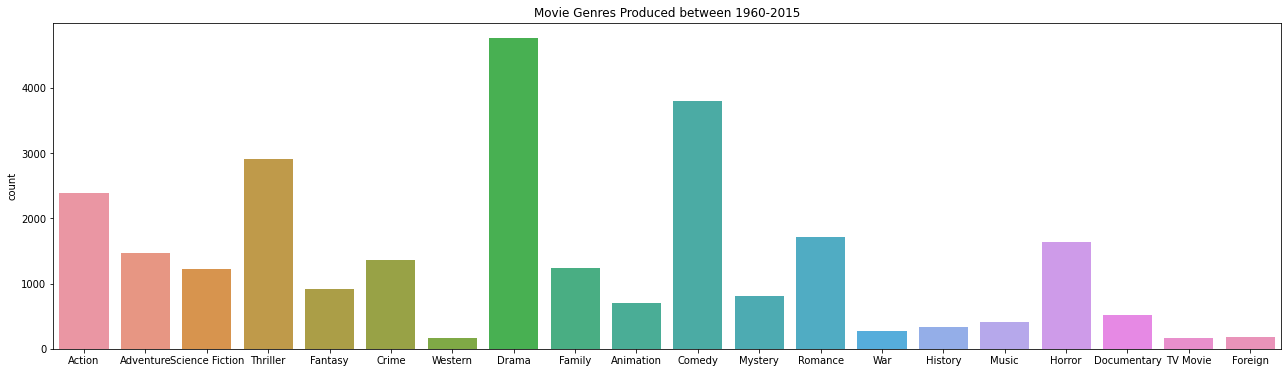

In [11]:
#@title Countplot to represent Movie Genres

fig, ax = plt.subplots(figsize=(22, 6))
sns.countplot(x=genres,ax=ax).set(title='Movie Genres Produced between 1960-2015')
plt.show()

Observation: Dramas were the most produced genres while TV movies,Foreign and Western genres had the lowest production

In [12]:
#@title Analysis of Production Companies

def Production_Companies(x):
          #concatenate production companies into one string
    companies_conc =df['production_companies'].str.cat(sep='|')

          #breakdown the production companies string into single rows
    companies =pd.Series(companies_conc.split('|'))
    companies=companies.value_counts(ascending=False)
    return(companies)

In [13]:
x= Production_Companies(df)
x

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Monophonic Inc.                             1
Populist Pictures                           1
Qatsi Productions                           1
CineEvelyn                                  1
Norm-Iris                                   1
Length: 7879, dtype: int64

Observation:**Universal pictures** had the highest movie productions with a coun of 522 movies followed by Warner Bros. with 509

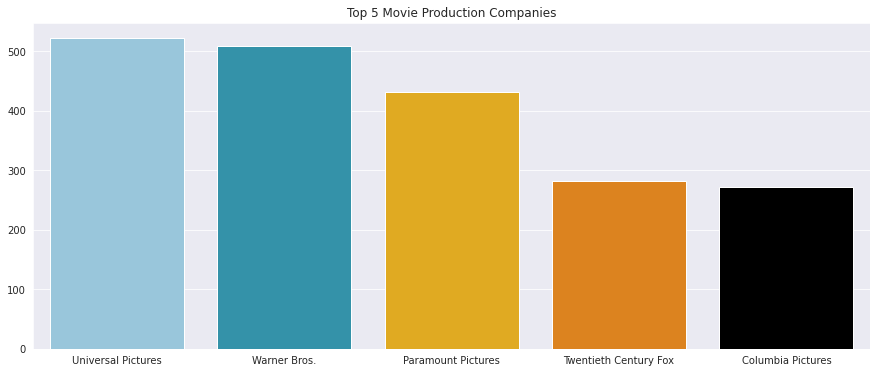

In [16]:
x_values = ["Universal Pictures","Warner Bros.","Paramount Pictures","Twentieth Century Fox","Columbia Pictures"]
x_axis = x[:5]

y=x_axis.values

colors=("#8ecae6","#219ebc","#ffb703","#fb8500","#000000")

sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x=x_values, y=y,palette= colors).set(title='Top 5 Movie Production Companies')
plt.show()

In [17]:
#@title Analysis of Movie Directors
def Directors(x):
          #concatenate movie directors into one string
    directors =df['director'].str.cat(sep='|')

          #breakdown the directors string into single rows
    movie_directors =pd.Series(directors.split('|'))
    movie_directors =movie_directors.value_counts(ascending=False)
    return(movie_directors)

In [18]:
Directors(df)

Woody Allen         46
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
Ridley Scott        23
                    ..
Mike Maguire         1
Tom Kuntz            1
John Simpson         1
Simon Hunter         1
Harold P. Warren     1
Length: 5362, dtype: int64

Observation: **Woody Allen** directed the most movies with a count of 46 movies

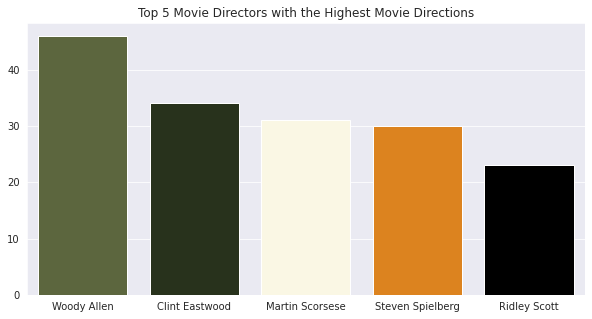

In [19]:
#@title Graph Representation of the top 5 movie directors
directorx = Directors(df)

x_values = ["Woody Allen","Clint Eastwood","Martin Scorsese","Steven Spielberg","Ridley Scott"]
x_axis = directorx[:5]

y=x_axis.values

colors=("#606c38","#283618","#fefae0","#fb8500","#000000")

sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x=x_values, y=y,palette= colors).set(title='Top 5 Movie Directors with the Highest Movie Directions')
plt.show()

In [20]:
#@title Analysis of Movies Cast

def Movie_Cast(x):
          #concatenate movie directors into one string
    cast =df['cast'].str.cat(sep='|')

          #breakdown the directors string into single rows
    movie_cast =pd.Series(cast.split('|'))
    movie_cast=movie_cast.value_counts(ascending=False)
    return(movie_cast)

In [21]:
Movie_Cast(df)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Andy Milonakis        1
Samantha Cope         1
Cynthia Watros        1
Satya Bhabha          1
Stephanie Nielson     1
Length: 19026, dtype: int64

Observation: **Robert De Niro** was casted in most movies.

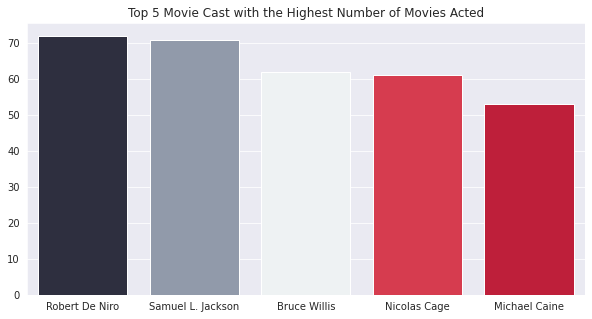

In [22]:
#@title Graph representation of the top 5 movies Cast
cast_x = Movie_Cast(df)

x_values = ["Robert De Niro","Samuel L. Jackson","Bruce Willis","Nicolas Cage","Michael Caine"]
x_axis = cast_x[:5]

y=x_axis.values

colors=("#2b2d42","#8d99ae","#edf2f4","#ef233c","#d90429")

sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x=x_values, y=y,palette= colors).set(title='Top 5 Movie Cast with the Highest Number of Movies Acted')
plt.show()

In [64]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [70]:
print(df['release_date'].dt.month_name().value_counts(ascending=False))

September    1331
October      1153
December      985
January       919
August        918
June          827
March         823
November      814
May           809
July          799
April         797
February      691
Name: release_date, dtype: int64


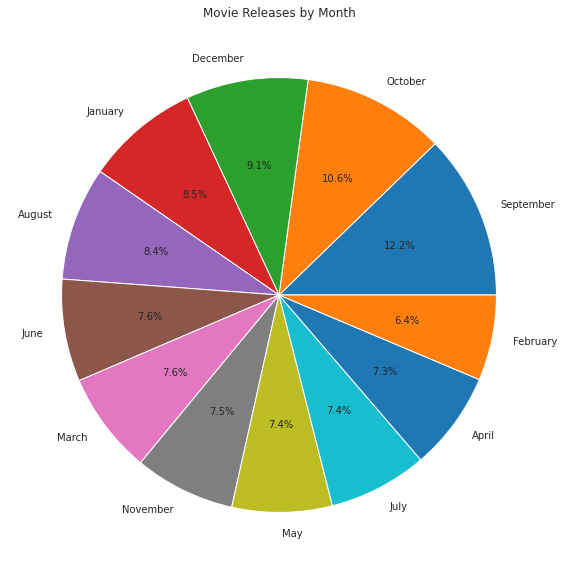

In [77]:
monthly_percentage = (df['release_date'].dt.month_name().value_counts(ascending=False))*100/len(df)
#explode = (0.1,0.0)

_, ax = plt.subplots(figsize=(15,10))
ax = monthly_percentage \
.plot(kind='pie', autopct='%.1f%%')
ax.set_title("Movie Releases by Month")
ax.set_ylabel('')
plt.show()

In [23]:
#drop columns
df1=df.drop(['imdb_id','id','original_title','cast','homepage','tagline','keywords','overview','director','release_date','genres','production_companies'], axis=1)
df1.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,120,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,119,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,136,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,137,2947,7.3,2015,174799923.1,1.385749e+09


In [24]:
#check for null values
df1.isnull().sum()

popularity      0
budget          0
revenue         0
runtime         0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

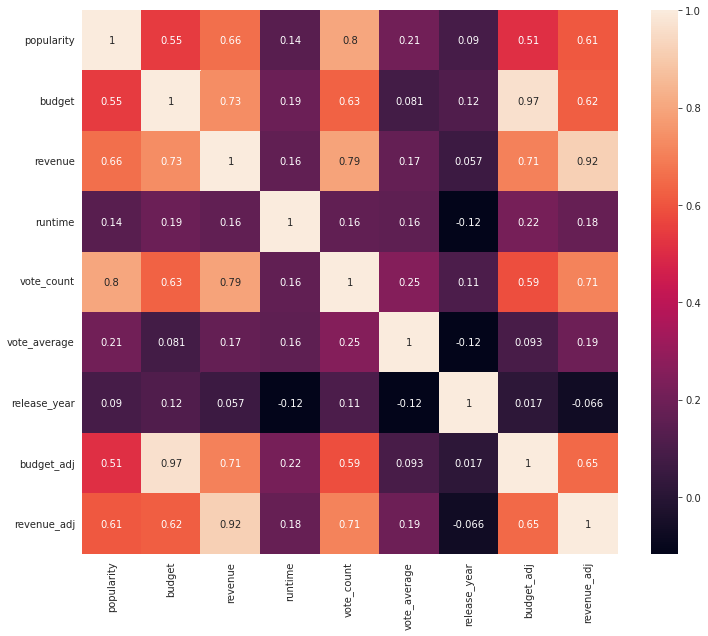

In [25]:
plt.figure(figsize = (12,10))
sns.heatmap(df1.corr(), annot =True)

**Features correlation observation**
*   Popularity has a high corrrelationwith vote_count, revenue
*   budget: has a high corrrelation with budget_adj and revenue
*   revenue: has a high corrrelation with budget_adj,revenue_adj,vote_count,budget,popularity
*   runtime has a low correlation with most of the features
*   vote_count has a high correlation with revenue_adj,revenue and popularity
*   vote_average has a low correlation with all other features
*   release_year has a low correlation with all other features
*   budget_adj has a high corelation with budget_adj,revenue_adj,budget,revenue
*   revenue_adj has a high corelation with budget_adj,vote_count,budget,revenue












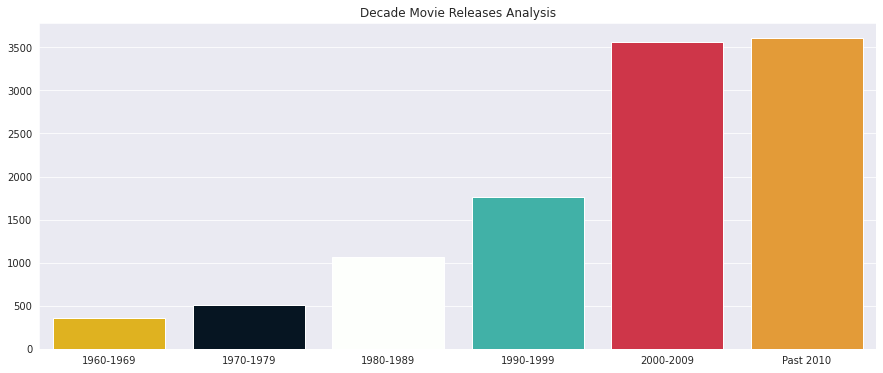

In [26]:
#@title Decade Movie Releases Comparison
the_sixties = df1.release_year[(df1.release_year>= 1960) & (df1.release_year <= 1969)]
the_seventies = df1.release_year[(df1.release_year>= 1970) & (df1.release_year <= 1979)]
the_eighties = df1.release_year[(df1.release_year>= 1980) & (df1.release_year <= 1989)]
the_nineties = df1.release_year[(df1.release_year>= 1990) & (df1.release_year <= 1999)]
two_thousands = df1.release_year[(df1.release_year >=2000) & (df1.release_year <= 2009)]
past_2010 = df.release_year[df.release_year >= 2010]

x_values= ["1960-1969","1970-1979","1980-1989","1990-1999","2000-2009", "Past 2010"]
y = [the_sixties.count(),the_seventies.count(),len(the_eighties.values),len(the_nineties.values),len(two_thousands.values),len(past_2010.values)]
colors=("#ffc300","#011627","#fdfffc","#2ec4b6","#e71d36","#ff9f1c")

sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x=x_values, y=y,palette= colors).set(title='Decade Movie Releases Analysis')
plt.show()

**Observation**
1. The two thousand decade had the most movie releases
2. Movie releases increased by decade and also increased rapidly by the 2000s decade


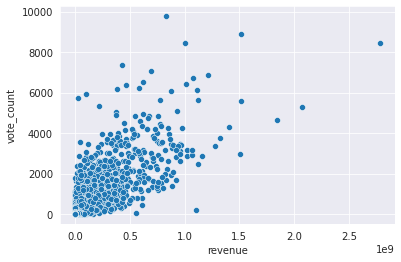

In [79]:
sns.scatterplot(y=df1['vote_count'],x=df1['revenue'])
plt.show()

In [29]:
# create the profits column that shows the movie profits
df1=df1.assign(Profits=lambda x: x.revenue - x.budget)
df1.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profits
0,32.985763,150000000,1513528810,124,5562,6.5,2015,137999939.3,1.392446e+09,1363528810
1,28.419936,150000000,378436354,120,6185,7.1,2015,137999939.3,3.481613e+08,228436354
2,13.112507,110000000,295238201,119,2480,6.3,2015,101199955.5,2.716190e+08,185238201
3,11.173104,200000000,2068178225,136,5292,7.5,2015,183999919.0,1.902723e+09,1868178225
4,9.335014,190000000,1506249360,137,2947,7.3,2015,174799923.1,1.385749e+09,1316249360
